## 1. Defining the Question

### a) Specifying the Question

> Mchezopesa Ltd requires a prediction result model of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

### b) Defining the Metric for Success


> The metric of success if we can create a model that can predict a football match result between two teams given the input: Home team, Away Team and whether the game is friendly or not.

### c) Understanding the context


> Mchezopesa Ltd will greatly benefit from being able to predict football results as they will be able to tailor the odds of football games that they offer on the betting platform.

### d) Recording the Experimental Design

> For the project to be a success, the following steps will be followed:

> > 1) Reading  the data.

> > 2) Feature engineering.

> > 3) Exploratory Data Analysis.

> > 4) Check for multicollinearity.

> > 5) Building the model.

> > 6) Cross-validate the model.

> > 7) Computing RMSE.

> > 8) Create residual plots for your models.

> > 9) Perform appropriate regressions on the data and provide justification.

> > 10) Challenge the developed solution.

### e) Data Relevance

> This was evaluated against the metric of success (after implementation of solution)

## 2. Reading the Data

We need to import the revelant libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Import the relevant libraries from sklearn for regression analysis
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [2]:
# Load the datasets
#the d_parser is used to read date as datetime instead of objects

d_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
ranking= pd.read_csv('fifa_ranking.csv', parse_dates=['rank_date'], date_parser=d_parser)
ranking.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [3]:
#Reading the results dataset
results = pd.read_csv('results.csv', parse_dates=['date'], date_parser=d_parser)
results.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


#Data Cleaning

In [4]:
#Check for null values
ranking.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [5]:
#check for  duplicates
ranking.duplicated().sum()

37

In [6]:
#Drop the duplicates
Fifa_ranking= ranking.drop_duplicates()
Fifa_ranking

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07


In [7]:
Fifa_ranking.duplicated().sum()

0

In [8]:
Fifa_ranking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57756 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   rank                     57756 non-null  int64         
 1   country_full             57756 non-null  object        
 2   country_abrv             57756 non-null  object        
 3   total_points             57756 non-null  float64       
 4   previous_points          57756 non-null  int64         
 5   rank_change              57756 non-null  int64         
 6   cur_year_avg             57756 non-null  float64       
 7   cur_year_avg_weighted    57756 non-null  float64       
 8   last_year_avg            57756 non-null  float64       
 9   last_year_avg_weighted   57756 non-null  float64       
 10  two_year_ago_avg         57756 non-null  float64       
 11  two_year_ago_weighted    57756 non-null  float64       
 12  three_year_ago_avg       57756 n

In [9]:
#Check head
Fifa_ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [10]:
# Check ranking
Fifa_ranking.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [11]:
#Check Null values for the second Dataset
results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [12]:
#Check for duplicates
results.duplicated().sum()

0

In [13]:
#Check head
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [14]:
#Check tail
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [15]:
#Check the columns in the Dataset
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

3. Checking the Data

In [16]:
# Checking whether each column has an appropriate datatype
#
results.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

In [17]:
Fifa_ranking.dtypes

rank                                int64
country_full                       object
country_abrv                       object
total_points                      float64
previous_points                     int64
rank_change                         int64
cur_year_avg                      float64
cur_year_avg_weighted             float64
last_year_avg                     float64
last_year_avg_weighted            float64
two_year_ago_avg                  float64
two_year_ago_weighted             float64
three_year_ago_avg                float64
three_year_ago_weighted           float64
confederation                      object
rank_date                  datetime64[ns]
dtype: object

In [18]:
#We drop all the columns that we dont need in our case we have city
results.drop(['city'],axis=1,inplace=True)
results.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland,False


In [19]:
Fifa_ranking.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [20]:
#we drop all the columns that we dont need in this case we have 
#'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
#'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg','three_year_ago_weighted'

In [21]:
Fifa_ranking.drop(['country_abrv','cur_year_avg','cur_year_avg_weighted','last_year_avg','last_year_avg_weighted','two_year_ago_avg','two_year_ago_weighted','three_year_ago_avg','three_year_ago_weighted'],axis=1,inplace=True)
Fifa_ranking.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,rank,country_full,total_points,previous_points,rank_change,confederation,rank_date
0,1,Germany,0.0,57,0,UEFA,1993-08-08
1,2,Italy,0.0,57,0,UEFA,1993-08-08
2,3,Switzerland,0.0,50,9,UEFA,1993-08-08
3,4,Sweden,0.0,55,0,UEFA,1993-08-08
4,5,Argentina,0.0,51,5,CONMEBOL,1993-08-08


<Figure size 432x288 with 0 Axes>

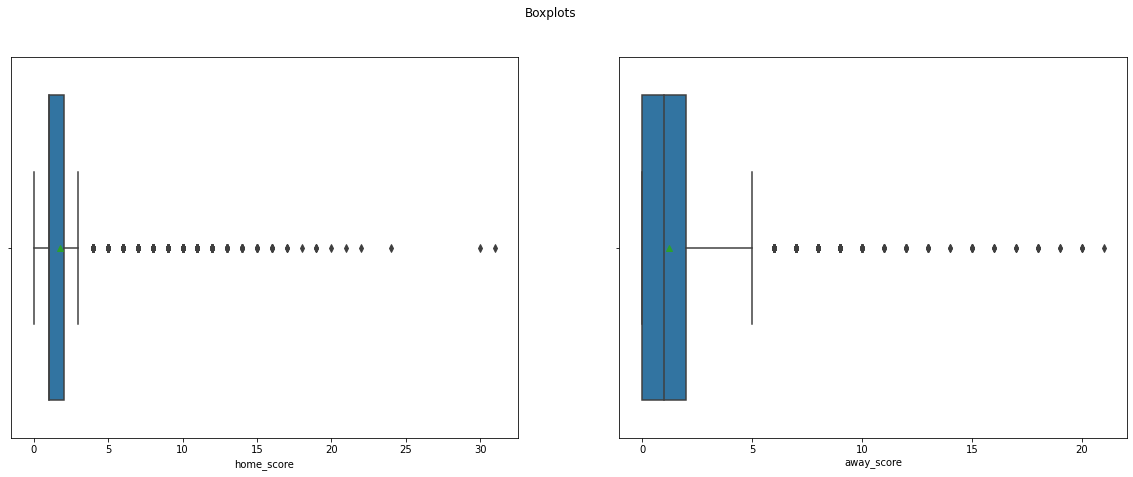

In [22]:
#checking for outliers for results
fig = plt.figure(figsize= (6,4),edgecolor='Black')
fig,(ax1,ax2) =plt.subplots(1,2, figsize=(20,7))
fig.suptitle('Boxplots')
sns.boxplot(data=results,x=results['home_score'],ax=ax1,showmeans=True)
sns.boxplot(data=results,x=results['away_score'],ax=ax2,showmeans=True)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

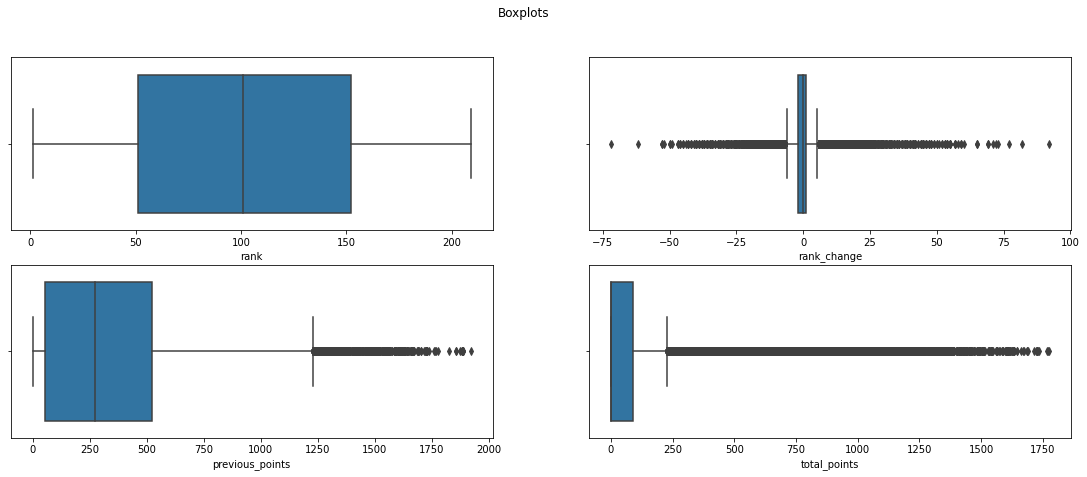

In [23]:
#checking the outliers for the fifa data
fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(19, 7))
fig.suptitle('Boxplots')
sns.boxplot(Fifa_ranking['rank'], ax=ax1)
sns.boxplot(Fifa_ranking['rank_change'], ax=ax2)
sns.boxplot(Fifa_ranking['previous_points'], ax=ax3)
sns.boxplot(Fifa_ranking['total_points'], ax=ax4)


In [24]:
#The common columns are date and rank date and also country full and country
#We are going to separate the date to months and years

In [25]:
Fifa_ranking['year'] = Fifa_ranking.rank_date.dt.year

Fifa_ranking['month'] = Fifa_ranking.rank_date.dt.month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
Fifa_ranking['year'].unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018])

In [27]:
results['year'] = results.date.dt.year

results['month'] = results.date.dt.month

In [28]:
results['year'].unique()

array([1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882,
       1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893,
       1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904,
       1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915,
       1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926,
       1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937,
       1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019])

In [29]:
results.drop(['date'],axis=1,inplace=True)

In [30]:
#filtering the result year to get years betwween 1993-2018

R1 = results['year'] > 1992
R2 = results['year'] < 2019
Results= results[R1 & R2]

In [31]:
Results.year.value_counts()

2008    1091
2011    1081
2004    1064
2000    1026
2001    1018
2012    1012
2015    1003
2007     978
2013     966
2017     958
2003     936
2016     926
2009     897
1997     863
2014     859
2018     855
2010     854
2006     838
1996     829
2005     804
2002     752
1999     739
1993     733
1998     698
1995     641
1994     569
Name: year, dtype: int64

In [32]:
Fifa_ranking

,rank,country_full,total_points,previous_points,rank_change,confederation,rank_date,year,month
0,1,Germany,0.0,57,0,UEFA,1993-08-08,1993,8
1,2,Italy,0.0,57,0,UEFA,1993-08-08,1993,8
2,3,Switzerland,0.0,50,9,UEFA,1993-08-08,1993,8
3,4,Sweden,0.0,55,0,UEFA,1993-08-08,1993,8
4,5,Argentina,0.0,51,5,CONMEBOL,1993-08-08,1993,8
...,...,...,...,...,...,...,...,...,...
57788,206,Anguilla,0.0,0,1,CONCACAF,2018-06-07,2018,6
57789,206,Bahamas,0.0,0,1,CONCACAF,2018-06-07,2018,6
57790,206,Eritrea,0.0,0,1,CAF,2018-06-07,2018,6
57791,206,Somalia,0.0,0,1,CAF,2018-06-07,2018,6


In [33]:
#dropping all the columns we dont need
Fifa_ranking.drop(['rank_date','total_points','previous_points','rank_change','confederation'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [34]:
# Preview the shape of the Data
Fifa_ranking.shape

(57756, 4)

In [35]:
Fifa_ranking.head(1)

,rank,country_full,year,month
0,1,Germany,1993,8


In [36]:
Results.shape

(22990, 9)

In [37]:
Results.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'country', 'neutral', 'year', 'month'],
      dtype='object')

### Merging the two datasets

In [38]:
#Merging the 2 datasets
#We will create 2 datasets one of home and another of away then we merge them

Home = pd.merge(Fifa_ranking,Results, how = 'inner', left_on = ['year','month','country_full'], right_on = ['year','month','home_team'])
Home.head()


,rank,country_full,year,month,home_team,away_team,home_score,away_score,tournament,country,neutral
0,4,Sweden,1993,8,Sweden,Switzerland,1,2,Friendly,Sweden,False
1,4,Sweden,1993,8,Sweden,France,1,1,FIFA World Cup qualification,Sweden,False
2,5,Argentina,1993,8,Argentina,Peru,2,1,FIFA World Cup qualification,Argentina,False
3,5,Argentina,1993,8,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina,False
4,8,Brazil,1993,8,Brazil,Mexico,1,1,Friendly,Brazil,False


In [39]:
#changing the column name to match the data set
Fifa_ranking.columns

Index(['rank', 'country_full', 'year', 'month'], dtype='object')

In [40]:
Results.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'country', 'neutral', 'year', 'month'],
      dtype='object')

In [41]:
Home.columns

Index(['rank', 'country_full', 'year', 'month', 'home_team', 'away_team',
       'home_score', 'away_score', 'tournament', 'country', 'neutral'],
      dtype='object')

In [42]:
Home.rename(columns={'rank':'Home Rank','country_full':'Home Country','year': 'Year','month':'Month','home_team':'Home Team','away_team':'Away Team','home_score':'Home Score','away_score':'Away Score','tournament':'Tournament','country':'Country','neutral':'Neutral'}, inplace = True)
Home

,Home Rank,Home Country,Year,Month,Home Team,Away Team,Home Score,Away Score,Tournament,Country,Neutral
0,4,Sweden,1993,8,Sweden,Switzerland,1,2,Friendly,Sweden,False
1,4,Sweden,1993,8,Sweden,France,1,1,FIFA World Cup qualification,Sweden,False
2,5,Argentina,1993,8,Argentina,Peru,2,1,FIFA World Cup qualification,Argentina,False
3,5,Argentina,1993,8,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina,False
4,8,Brazil,1993,8,Brazil,Mexico,1,1,Friendly,Brazil,False
...,...,...,...,...,...,...,...,...,...,...,...
18588,139,Botswana,2018,6,Botswana,Mauritius,6,0,COSAFA Cup,South Africa,True
18589,147,Lesotho,2018,6,Lesotho,Eswatini,1,0,COSAFA Cup,South Africa,True
18590,147,Lesotho,2018,6,Lesotho,Zimbabwe,0,0,COSAFA Cup,South Africa,True
18591,160,Barbados,2018,6,Barbados,Belize,0,0,Friendly,Barbados,False


In [43]:
Away = pd.merge(Fifa_ranking, Results, how = 'inner', left_on = ['year', 'month','country_full'], 
                     right_on = ['year', 'month','away_team'])
Away.head()

,rank,country_full,year,month,home_team,away_team,home_score,away_score,tournament,country,neutral
0,3,Switzerland,1993,8,Sweden,Switzerland,1,2,Friendly,Sweden,False
1,5,Argentina,1993,8,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,False
2,5,Argentina,1993,8,Paraguay,Argentina,1,3,FIFA World Cup qualification,Paraguay,False
3,5,Argentina,1993,8,Colombia,Argentina,2,1,FIFA World Cup qualification,Colombia,False
4,8,Brazil,1993,8,Venezuela,Brazil,1,5,FIFA World Cup qualification,Venezuela,False


In [44]:
Away.rename({'rank':'Away Rank','country_full':'Away Country','year':'Year','month':'Month','home_team':'Home Team','away_team':'Away Team','home_score':'Home Score','away_score':'Away Score','tournament':'Tournament','country':'Country','neutral':'Neutral'}, axis= 1, inplace = True)
Away.head()

,Away Rank,Away Country,Year,Month,Home Team,Away Team,Home Score,Away Score,Tournament,Country,Neutral
0,3,Switzerland,1993,8,Sweden,Switzerland,1,2,Friendly,Sweden,False
1,5,Argentina,1993,8,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,False
2,5,Argentina,1993,8,Paraguay,Argentina,1,3,FIFA World Cup qualification,Paraguay,False
3,5,Argentina,1993,8,Colombia,Argentina,2,1,FIFA World Cup qualification,Colombia,False
4,8,Brazil,1993,8,Venezuela,Brazil,1,5,FIFA World Cup qualification,Venezuela,False


In [45]:
Games= pd.merge(Home,Away, how='inner', left_on=['Year','Month','Away Team','Home Score','Away Score','Home Team','Tournament','Country','Neutral'],right_on=['Year','Month','Away Team','Home Score','Away Score','Home Team','Tournament','Country','Neutral'])
Games

,Home Rank,Home Country,Year,Month,Home Team,Away Team,Home Score,Away Score,Tournament,Country,Neutral,Away Rank,Away Country
0,4,Sweden,1993,8,Sweden,Switzerland,1,2,Friendly,Sweden,False,3,Switzerland
1,4,Sweden,1993,8,Sweden,France,1,1,FIFA World Cup qualification,Sweden,False,12,France
2,5,Argentina,1993,8,Argentina,Peru,2,1,FIFA World Cup qualification,Argentina,False,70,Peru
3,5,Argentina,1993,8,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina,False,67,Paraguay
4,8,Brazil,1993,8,Brazil,Mexico,1,1,Friendly,Brazil,False,14,Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16985,137,Angola,2018,6,Angola,Malawi,0,0,COSAFA Cup,South Africa,True,123,Malawi
16986,139,Botswana,2018,6,Botswana,Mauritius,6,0,COSAFA Cup,South Africa,True,155,Mauritius
16987,147,Lesotho,2018,6,Lesotho,Zimbabwe,0,0,COSAFA Cup,South Africa,True,118,Zimbabwe
16988,160,Barbados,2018,6,Barbados,Belize,0,0,Friendly,Barbados,False,163,Belize


In [46]:
Games.columns

Index(['Home Rank', 'Home Country', 'Year', 'Month', 'Home Team', 'Away Team',
       'Home Score', 'Away Score', 'Tournament', 'Country', 'Neutral',
       'Away Rank', 'Away Country'],
      dtype='object')

In [47]:
Games.isnull().sum()

Home Rank       0
Home Country    0
Year            0
Month           0
Home Team       0
Away Team       0
Home Score      0
Away Score      0
Tournament      0
Country         0
Neutral         0
Away Rank       0
Away Country    0
dtype: int64

In [48]:
Games.duplicated().sum()

126

In [49]:
Games = Games.drop_duplicates()

In [50]:
Games.duplicated().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

<Figure size 648x360 with 0 Axes>

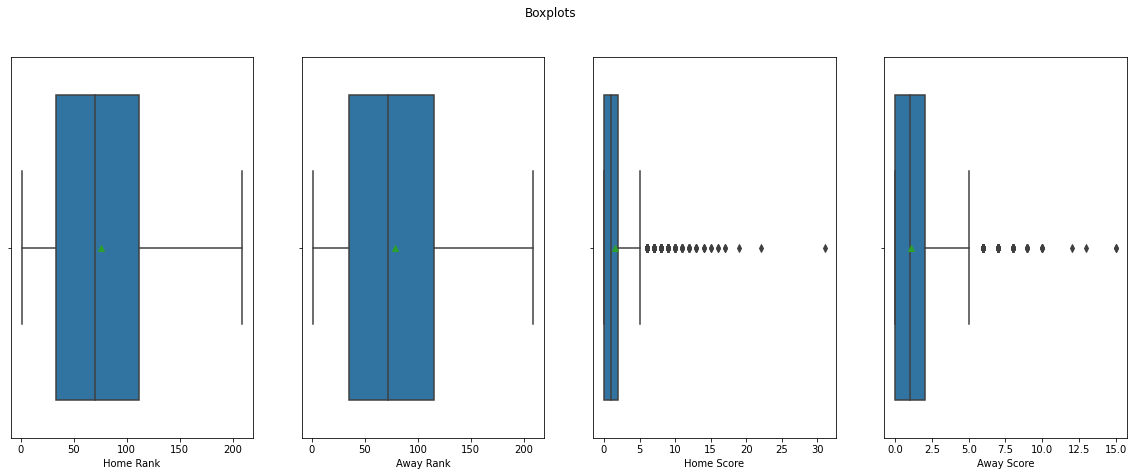

In [51]:
# Visualizing the data outliers using boxplots
fig = plt.figure(figsize= (9,5),edgecolor='lightgreen')
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(20,7))
fig.suptitle('Boxplots')
sns.boxplot(Games['Home Rank'],ax=ax1,showmeans=True)
sns.boxplot(Games['Away Rank'],ax=ax2,showmeans=True)
sns.boxplot(Games['Home Score'],ax=ax3,showmeans=True)
sns.boxplot(Games['Away Score'],ax=ax4,showmeans=True)

The outliers for this data are few and can be really helpful in predicting the data hence we do not need to drop them.

In [52]:
#importing Label Encoder
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'neutral'.
Games['Neutral']= label_encoder.fit_transform(Games['Neutral'])
Games['Neutral'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


array([0, 1])

# 3. Exploratory Analysis

# Univariate Analysis

## Categorical Variables 

Frequency tables

In [53]:
Games.Neutral.value_counts()

0    12883
1     3981
Name: Neutral, dtype: int64

In [54]:
Games.Tournament.value_counts()

Friendly                                6408
FIFA World Cup qualification            3950
UEFA Euro qualification                 1383
African Cup of Nations qualification     871
AFC Asian Cup qualification              387
                                        ... 
Dragon Cup                                 4
Copa del Pacífico                          4
OSN Cup                                    4
SKN Football Festival                      2
Copa América qualification                 2
Name: Tournament, Length: 65, dtype: int64

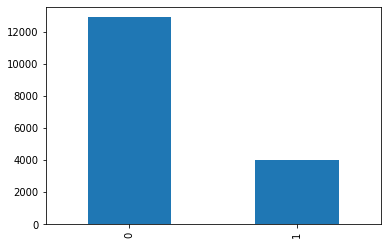

<Figure size 1008x576 with 0 Axes>

In [55]:
Games['Neutral'].value_counts().plot(kind='bar')
fig=plt.figure(figsize=(14,8))
plt.show()

### Continous Variables

In [56]:
mean = Games["Home Score"].mean()
median = Games["Home Score"].median()
mode = Games["Home Score"].mode()
std = Games["Home Score"].std()
var = Games["Home Score"].var()
max = Games["Home Score"].max()
min = Games["Home Score"].min()
range = max - min
quantile = Games["Home Score"].quantile([0.25,0.5,0.75])
print('The mean is',mean)
print('The median is',median)
print('The mode is',mode)
print('The standard deviation is',std)
print('The variance is',var)
print('The Range is',range)
print('The quantile is',quantile)

The mean is 1.6046015180265654
The median is 1.0
The mode is 0    1
dtype: int64
The standard deviation is 1.6159724846769814
The variance is 2.611367071233097
The Range is 31
The quantile is 0.25    0.0
0.50    1.0
0.75    2.0
Name: Home Score, dtype: float64


In [57]:
mean = Games["Away Score"].mean()
median = Games["Away Score"].median()
mode = Games["Away Score"].mode()
std = Games["Away Score"].std()
var = Games["Away Score"].var()
max = Games["Away Score"].max()
min = Games["Away Score"].min()
range = max - min
quantile = Games["Away Score"].quantile([0.25,0.5,0.75])
print('The mean is',mean)
print('The median is',median)
print('The mode is',mode)
print('The standard deviation is',std)
print('The variance is',var)
print('The Range is',range)
print('The quantile is',quantile)

The mean is 1.0696157495256167
The median is 1.0
The mode is 0    0
dtype: int64
The standard deviation is 1.2459094216764777
The variance is 1.5522902870222148
The Range is 15
The quantile is 0.25    0.0
0.50    1.0
0.75    2.0
Name: Away Score, dtype: float64


In [58]:
# Ploting the univariate summaries and recording our observations
#
mean = Games["Home Rank"].mean()
median = Games["Home Rank"].median()
mode = Games["Home Rank"].mode()
std = Games["Home Rank"].std()
var = Games["Home Rank"].var()
max = Games["Home Rank"].max()
min = Games["Home Rank"].min()
range = max - min
quantile = Games["Home Rank"].quantile([0.25,0.5,0.75])
print('The mean is',mean)
print('The median is',median)
print('The mode is',mode)
print('The standard deviation is',std)
print('The variance is',var)
print('The Range is',range)
print('The quantile is',quantile)

The mean is 76.02988614800759
The median is 70.0
The mode is 0    5
dtype: int64
The standard deviation is 50.85349756773571
The variance is 2586.0782148717017
The Range is 208
The quantile is 0.25     33.0
0.50     70.0
0.75    112.0
Name: Home Rank, dtype: float64


In [59]:
mean = Games["Away Rank"].mean()
median = Games["Away Rank"].median()
mode = Games["Away Rank"].mode()
std = Games["Away Rank"].std()
var = Games["Away Rank"].var()
max = Games["Away Rank"].max()
min = Games["Away Rank"].min()
range = max - min
quantile = Games["Away Rank"].quantile([0.25,0.5,0.75])
print('The mean is',mean)
print('The median is',median)
print('The mode is',mode)
print('The standard deviation is',std)
print('The variance is',var)
print('The Range is',range)
print('The quantile is',quantile)

The mean is 78.86201375711575
The median is 72.0
The mode is 0    1
dtype: int64
The standard deviation is 52.008990178252134
The variance is 2704.935059361527
The Range is 208
The quantile is 0.25     35.0
0.50     72.0
0.75    115.0
Name: Away Rank, dtype: float64


We find the kurtosis for our Data

In [60]:
data= Games
kurt1 = data['Home Rank'].kurt()
print("The kurtosis for the Home Rank  is: ", kurt1)
if kurt1 > 0:
  print("Leptokurtic")
elif kurt1 < 0:
  print("Platykurtic")
else:
  print("Mesokurtic")
print('\n') 

kurt2 = data['Away Rank'].kurt()
print("The kurtosis for the Away Rank is: ", kurt2)
if kurt2 > 0:
  print("Leptokurtic")
elif kurt2 < 0:
  print("Platykurtic")
else:
  print("Mesokurtic")
print('\n') 

kurt3 = data['Home Score'].kurt()
print("The kurtosis for the Home score is: ", kurt3)
if kurt3 > 0:
  print("Leptokurtic")
elif kurt3 < 0:
  print("Platykurtic")
else:
  print("Mesokurtic")
print('\n') 

kurt4 = data['Away Score'].kurt()
print("The kurtosis for the Away Score is: ", kurt4)
if kurt4 > 0:
  print("Leptokurtic")
elif kurt4 < 0:
  print("Platykurtic")
else:
  print("Mesokurtic")
print('\n') 

The kurtosis for the Home Rank  is:  -0.6878888085628345
Platykurtic


The kurtosis for the Away Rank is:  -0.7064259982554106
Platykurtic


The kurtosis for the Home score is:  15.265077316005975
Leptokurtic


The kurtosis for the Away Score is:  7.157593286498087
Leptokurtic




We check for the skewness of our Data

In [61]:
skew1 = data['Home Score'].skew()
print("The skewness for the Home Score is: ", skew1)
if skew1 == 0:
  print("The distribution is symmetrical")
elif skew1 > 0:
  print("The distribution is positively skewed")
else:
  print("The distribution is negatively skewed")
print('\n')

skew2 = data['Away Score'].skew()
print("The skewness for the Away Score is: ", skew2)
if skew2 == 0:
  print("The distribution is symmetrical")
elif skew2 > 0:
  print("The distribution is positively skewed")
else:
  print("The distribution is negatively skewed")
print('\n')

skew3 = data['Home Rank'].skew()
print("The skewness for the Home Rank is: ", skew3)
if skew3 == 0:
  print("The distribution is symmetrical")
elif skew3 > 0:
  print("The distribution is positively skewed")
else:
  print("The distribution is negatively skewed")
print('\n')

skew4 = data['Away Rank'].skew()
print("The skewness for the Away Rank is: ", skew4)
if skew4 == 0:
  print("The distribution is symmetrical")
elif skew4 > 0:
  print("The distribution is positively skewed")
else:
  print("The distribution is negatively skewed")
print('\n')


The skewness for the Home Score is:  2.3260890277280213
The distribution is positively skewed


The skewness for the Away Score is:  1.9274650196937393
The distribution is positively skewed


The skewness for the Home Rank is:  0.44818550479767305
The distribution is positively skewed


The skewness for the Away Rank is:  0.4476944492702198
The distribution is positively skewed




# BIVARIATE ANALYSIS

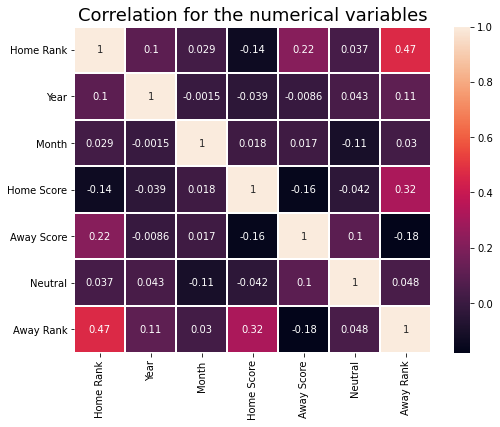

In [62]:
Correlation = Games.corr()
plt.figure(figsize=(8,6))
sns.heatmap(Correlation,xticklabels=Correlation.columns,yticklabels=Correlation.columns,linewidth=1.0,annot=True)
plt.title('Correlation for the numerical variables',fontsize=18)
plt.show()

# SOLUTION IMPLEMENTATION

## POLYNOMIAL REGRESSION

### Model 1 : Predicting Home Score 


### Checking for Multicollinearlity

In [63]:

independent_only = Games[['Home Rank','Away Rank','Away Score']]
# Let's display the correlations between the variables
Correlations = independent_only.corr()

Correlations

,Home Rank,Away Rank,Away Score
Home Rank,1.000000,0.469472,0.221711
Away Rank,0.469472,1.000000,-0.179898
Away Score,0.221711,-0.179898,1.000000


In [64]:
#vif score
pd.DataFrame(np.linalg.inv(Correlations.values), index = Correlations.index, columns=Correlations.columns)


,Home Rank,Away Rank,Away Score
Home Rank,1.464725,-0.771021,-0.463451
Away Rank,-0.771021,1.439306,0.429872
Away Score,-0.463451,0.429872,1.180086


Since our VIF scores are less than five we assume there isn't much multicollinearity hence there is no need for dropping variables.

In [65]:
#preparing the data for train-test
X= Games[['Home Rank','Away Rank','Away Score']]
y= Games['Home Score'].values

In [66]:
# Fit polynomial Regression to the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
#Using X_test to predict
pred = lin_reg_2.predict(poly_reg.fit_transform(X_test))

In [68]:
#printing out predicted home scores against test
np.set_printoptions(precision=2)
print(np.concatenate((pred.reshape(len(pred),1), y_test.reshape(len(y_test),1)),1))

[[0.77 3.  ]
 [3.03 0.  ]
 [1.79 2.  ]
 ...
 [1.1  0.  ]
 [2.19 0.  ]
 [2.44 2.  ]]


In [69]:
#Evaluating Model
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R-Squared:', metrics.r2_score(y_test, pred))

Mean Absolute Error: 1.032967862533516
Mean Squared Error: 1.9693630273981448
Root Mean Squared Error: 1.4033399543225957
R-Squared: 0.2400775218724278


The model is poor because the RMSE is almost equal to the mean score hence caanot be used to make reliable predictions.


###Bartlett's Test for Heteroskedasticity

Finding residuals

In [70]:
# This is our prediction for Home Scores based on our model
# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset
residuals = np.subtract(pred, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()


,0
count,3373.000000
mean,0.030244
std,1.403222
min,-12.046422
25%,-0.656562
50%,0.225470
75%,0.941229
max,4.520550


In [71]:
residuals.mean()

0.030243934661329814

In [72]:
residuals

array([-2.23,  3.03, -0.21, ...,  1.1 ,  2.19,  0.44])

In [73]:
pred

array([0.77, 3.03, 1.79, ..., 1.1 , 2.19, 2.44])

Our mean is close to 0, indicating that we tend to be fairly correct, although slightly underestimating chances by, on average, 3%.

In [74]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(pred, residuals)
test_result, p_value

(1145.8617551190193, 3.558583209826235e-251)

In [75]:
# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability,degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogenous across our data



inf


In [76]:
if (test_result > critical_value):
  print('The variances are unequal and the model should be reassessed')
else:
  print('The variances are homogeneous!')

The variances are homogeneous!


This results show there is no heteroskedasticity since the variances are homogenous.

###Cross-validation using K-Fold 

In [77]:
from sklearn.model_selection import KFold

# We will use the same 4 independent variables for this
X = Games[['Home Rank', 'Away Rank', 'Away Score']].values
y = Games['Home Score'].values

folds = KFold(n_splits=5)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 1.4848774807261145

Training model 2
Model 2 Root Mean Squared Error: 1.6216257869567638

Training model 3
Model 3 Root Mean Squared Error: 1.3617903305507173

Training model 4
Model 4 Root Mean Squared Error: 1.3734077715359432

Training model 5
Model 5 Root Mean Squared Error: 1.3561342492105248


In [78]:
np.mean(RMSES)

1.4395671237960128

###**Model 2: Away Scores** 



> Check for Multicollinearity



In [79]:
independent_only = Games[['Home Rank','Away Rank','Home Score']]
# Let's display the correlations between the variables
correlations = independent_only.corr()

correlations

,Home Rank,Away Rank,Home Score
Home Rank,1.000000,0.469472,-0.135415
Away Rank,0.469472,1.000000,0.318738
Home Score,-0.135415,0.318738,1.000000


In [80]:
#vif score
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)


,Home Rank,Away Rank,Home Score
Home Rank,1.451059,-0.827980,0.460404
Away Rank,-0.827980,1.585531,-0.617491
Home Score,0.460404,-0.617491,1.259164


### Perform a traintest split

In [81]:
X= Games[['Home Rank','Away Rank','Home Score']].values
y= Games['Away Score'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [82]:
poly_reg = PolynomialFeatures(degree = 5)
X_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
#Using X_test to predict
preds = lin_reg_2.predict(poly_reg.fit_transform(X_test))

In [84]:
#printing out predicted home scores against test
np.set_printoptions(precision=2)
print(np.concatenate((preds.reshape(len(preds),1),y_test.reshape(len(y_test),1)),1))

[[1.75 2.  ]
 [1.25 0.  ]
 [0.84 3.  ]
 ...
 [1.21 4.  ]
 [0.49 0.  ]
 [0.44 1.  ]]


In [85]:
#Evaluating Model
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, preds))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, preds))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
print('R-Squared:', metrics.r2_score(y_test, preds))

Mean Absolute Error: 0.8482322524944187
Mean Squared Error: 1.2488694916560432
Root Mean Squared Error: 1.1175282956847417
R-Squared: 0.18019354769324525


The model is very poor, the RMSE is almost equal to the mean score, hence cannot be used to make predictions.


### Bartlett's Test for Heteroskedasticity

Finding residuals

In [86]:
# This is our prediction for Home Scores based on our model
# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset
residuals = np.subtract(preds, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()


,0
count,3373.000000
mean,0.021755
std,1.117482
min,-9.209811
25%,-0.498908
50%,0.249950
75%,0.783778
max,3.054808


In [87]:
residuals.mean()

0.021755170401263322

Our mean is close to 0, indicating that we tend to be fairly correct, although slightly underestimating chances by, on average, 2%.

In [88]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(preds, residuals)
test_result, p_value

(1615.9174017674798, 0.0)

In [89]:
# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(preds)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability,degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogenous across our data



inf


In [90]:
if (test_result > critical_value):
  print('The variances are unequal and the model should be reassessed')
else:
  print('The variances are homogeneous!')

The variances are homogeneous!


This results show there is no heteroskedasticity since the variances are homogenous.

###Cross-validation using K-Fold 

In [91]:
from sklearn.model_selection import KFold

# We will use the same 4 independent variables for this
X = Games[['Home Rank', 'Away Rank', 'Home Score']].values
y = Games['Away Score'].values

folds = KFold(n_splits=5)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('We are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

We are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 1.146784716380209

Training model 2
Model 2 Root Mean Squared Error: 1.18107763528462

Training model 3
Model 3 Root Mean Squared Error: 1.1840742976762093

Training model 4
Model 4 Root Mean Squared Error: 1.1238163873271958

Training model 5
Model 5 Root Mean Squared Error: 1.1001990992517385


In [92]:
np.mean(RMSES)

1.1471904271839946

### LOGISTIC REGRESSION

In [93]:
# Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

# Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

def match_result(row):
  if row['Home Score'] < row['Away Score']:
    outcome = 'Lose'
  elif row['Home Score'] > row['Away Score']:
    outcome = 'Win'
  else:
    outcome = 'Draw'
  return outcome

Games['Outcome'] = Games.apply(match_result, axis=1)
Games

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Home Rank,Home Country,Year,Month,Home Team,Away Team,Home Score,Away Score,Tournament,Country,Neutral,Away Rank,Away Country,Outcome
0,4,Sweden,1993,8,Sweden,Switzerland,1,2,Friendly,Sweden,0,3,Switzerland,Lose
1,4,Sweden,1993,8,Sweden,France,1,1,FIFA World Cup qualification,Sweden,0,12,France,Draw
2,5,Argentina,1993,8,Argentina,Peru,2,1,FIFA World Cup qualification,Argentina,0,70,Peru,Win
3,5,Argentina,1993,8,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina,0,67,Paraguay,Draw
4,8,Brazil,1993,8,Brazil,Mexico,1,1,Friendly,Brazil,0,14,Mexico,Draw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16985,137,Angola,2018,6,Angola,Malawi,0,0,COSAFA Cup,South Africa,1,123,Malawi,Draw
16986,139,Botswana,2018,6,Botswana,Mauritius,6,0,COSAFA Cup,South Africa,1,155,Mauritius,Win
16987,147,Lesotho,2018,6,Lesotho,Zimbabwe,0,0,COSAFA Cup,South Africa,1,118,Zimbabwe,Draw
16988,160,Barbados,2018,6,Barbados,Belize,0,0,Friendly,Barbados,0,163,Belize,Draw


In [94]:
Games.Outcome.value_counts()

Win     8158
Lose    4666
Draw    4040
Name: Outcome, dtype: int64

In [95]:

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
Games['Outcome'] = labelencoder.fit_transform(Games['Outcome'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [96]:
Games.Outcome.value_counts()

2    8158
1    4666
0    4040
Name: Outcome, dtype: int64

In [97]:
Games.drop(['Year','Home Country','Month','Tournament','Country','Neutral'],axis=1,inplace=True)
Games.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Home Rank,Home Team,Away Team,Home Score,Away Score,Away Rank,Away Country,Outcome
0,4,Sweden,Switzerland,1,2,3,Switzerland,1
1,4,Sweden,France,1,1,12,France,0
2,5,Argentina,Peru,2,1,70,Peru,2
3,5,Argentina,Paraguay,0,0,67,Paraguay,0
4,8,Brazil,Mexico,1,1,14,Mexico,0


In [98]:
X = Games[['Home Rank', 'Away Rank', 'Home Score','Away Score']].values
y = Games['Outcome'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

In [99]:
from sklearn.linear_model import LogisticRegression

Reg = LogisticRegression()
Reg.fit(X_train, y_train)
Reg 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
y_pred =Reg.predict(X_test)

In [101]:
from sklearn.metrics import confusion_matrix
Matrix = confusion_matrix(y_test, y_pred)
Matrix


array([[ 825,    0,    0],
       [   0,  923,    0],
       [   0,    0, 1625]])

## 8. Challenging the Solution

> The model was not optimal, a way to improve the model is to find a way to incorporate time(Year) into the model which may improve the accuracy of the model

## 9. Follow up questions

## a) Did we have the right data?


> From the model we had some of the relevant data but not sufficient.

## b) Do we need other data to answer our question?


> From the model, it seems we may have required some more independent models that would explain the target variable.

## c) Did we have the right question?

> The question was a good one but based on the data we had, we were not able to answer it with high confidence. The model is suspect.
